# Trabalho de Probabilidade e Estatística

---------------------------------

Integrantes:

Bruno Arthur Basso Silva - 22.123.067-5

Gabriela Molina Ciocci - 22.222.032-9

---------------------------------
Tópicos Necessários:

a)	Média, variância, desvio padrão e mediana para x e y.

b)	O histograma de x e y.

c)	O boxplot de x e y.

d)	O coeficiente de correlação de x e y.

e)	Fazer o teste de normalidade para  y e x.

f)	Fazer o gráfico de densidade junto com o histograma para as variáveis x e y.



# - Tratando o Dataset para melhor visualização e análise -

In [1]:
# IMPORTANDO BIBLIOTECAS NECESSÁRIAS PARA FUNCIONAMENTO DO CÓDIGO
import pandas as pd
import numpy as np
from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('winequality.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)



Número de linhas e colunas: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
# Substitui Nan por 0
data = data.replace('0', np.nan)
data.head(25)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [3]:
# remove as linhas com NaN
data = data.dropna()
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Remove linhas duplicadas
data = data.drop_duplicates()

# Substitui valores infinitos por NaN e remove as linhas com NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


# A) Calculando os valores

 Média, variância, desvio padrão e mediana para x e y.




In [5]:
X = data['fixed acidity']  # variável alvo
Y = data['residual sugar']  # atributo a ser analisado

# a) Cálculo de média;
X_media = np.mean(X)
Y_media = np.mean(Y)

#  variância;
X_variancia = np.var(X)
Y_variancia = np.var(Y)

# desvio padrão;
X_desvio_padrao = np.std(X)
Y_desvio_padrao = np.std(Y)

# mediana.
X_mediana = np.median(X)
Y_mediana = np.median(Y)

print(f"(X)> Média: {X_media:.2f} -- Variância: {X_variancia:.2f} -- Desvio Padrão: {X_desvio_padrao:.2f} -- Mediana: {X_mediana:.2f}")
print("---------------------------------------------------------------------------")
print(f"(Y)> Média: {Y_media:.2f} -- Variância: {Y_variancia:.2f} -- Desvio Padrão: {Y_desvio_padrao:.2f} -- Mediana: {Y_mediana:.2f}")


(X)> Média: 8.31 -- Variância: 3.01 -- Desvio Padrão: 1.74 -- Mediana: 7.90
---------------------------------------------------------------------------
(Y)> Média: 2.52 -- Variância: 1.83 -- Desvio Padrão: 1.35 -- Mediana: 2.20


# B) Histograma para entender a dispersão dos dados em cada intervalo

C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


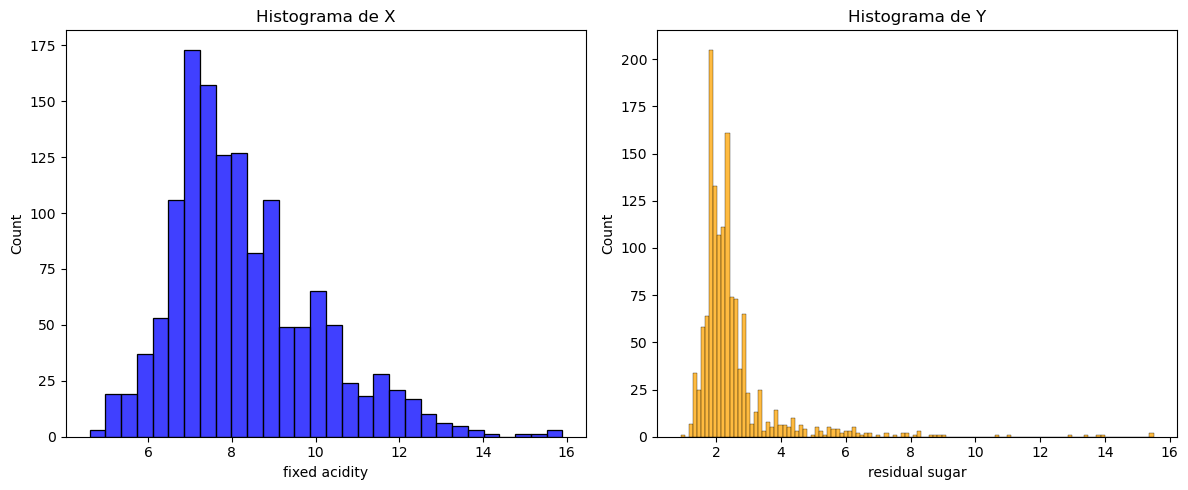

In [6]:
#b) Histograma de X e Y

# Configuração do gráfico
plt.figure(figsize=(12, 5))

# Histograma de X
plt.subplot(1, 2, 1)
sns.histplot(X, color='blue', edgecolor='black')
plt.title('Histograma de X')

# Histograma de Y
plt.subplot(1, 2, 2)
sns.histplot(Y, color='orange', edgecolor='black')
plt.title('Histograma de Y')

plt.tight_layout()
plt.show()


# C) Box Plot para entender a distribuição dos valores

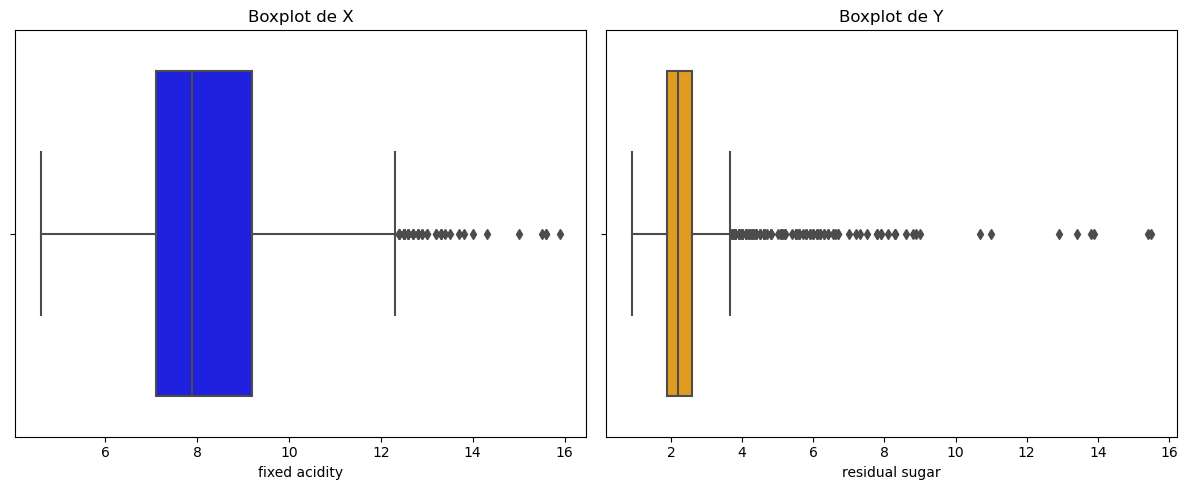

In [7]:
# Boxplot de X e Y
plt.figure(figsize=(12, 5))

# Boxplot de X
plt.subplot(1, 2, 1)
sns.boxplot(x=X, color='blue')
plt.title('Boxplot de X')

# Boxplot de Y
plt.subplot(1, 2, 2)
sns.boxplot(x=Y, color='orange')
plt.title('Boxplot de Y')

plt.tight_layout()
plt.show()


# D) Coeficiente de correlação de X e Y

In [8]:
# Coeficiente de Correlação de Pearson de X e Y

correlacao_pearson = np.corrcoef(X, Y)[0, 1]
print(f"Coeficiente de Correlação de Pearson entre X e Y: {correlacao_pearson:.4f}")

# Caso queira ver a lista, somente tirar "[0, 1]" e a quantidade de casa numericas do prinft ":.4f"

Coeficiente de Correlação de Pearson entre X e Y: 0.1110


# E) Teste de Normalidade de X e Y

In [9]:
from scipy.stats import shapiro

# O p-valor representa a probabilidade de observar os dados assumindo que a hipótese nula é verdadeira, ou seja, assumindo 
# que os dados seguem uma distribuição normal.

# -------- VERIFICAÇÃO DO RESULTADO --------
# Um p-valor maior que 0,05 indica que não há evidências suficientes para rejeitar a hipótese nula, sugerindo 
# que os dados podem ser considerados normais.

# E se for menor ou igual a 0,05 indica evidências contra a normalidade, sugerindo que os dados não seguem uma distribuição normal.

print("|------------- TESTES DE NORMALIDADE -------------|\n")
# Teste de normalidade para X
stat_X, p_valor_X = shapiro(X)
print("                      (X)")
print(f"Estatística -> {stat_X:.3f} |--| p-valor -> {p_valor_X:.3f}")

alpha = 0.05
# Verificação do resultado
if p_valor_X > alpha:
    print("Segue uma distribuição normal, p-valor > 0.05.")
    print("-> Amostra Gaussiana (aceita H0)")
else:
    print("Não segue uma distribuição normal, p-valor <= 0.05.")
    print("-> Amostra Não Gaussiana (rejeita H0)")



print("---------------------------------------------------\n")
# Teste de normalidade para Y
stat_Y, p_valor_Y = shapiro(Y)
print("                      (Y)")
print(f"Estatística -> {stat_Y:.3f} |--| p-valor -> {p_valor_Y:.3f}")



if p_valor_Y > alpha:
    print("Segue uma distribuição normal, p-valor > 0.05.")
    print("-> Amostra Gaussiana (aceita H0)\n")
else:
    print("Não segue uma distribuição normal, p-valor <= 0.05.")
    print("-> Amostra Não Gaussiana (rejeita H0)\n")



|------------- TESTES DE NORMALIDADE -------------|

                      (X)
Estatística -> 0.947 |--| p-valor -> 0.000
Não segue uma distribuição normal, p-valor <= 0.05.
-> Amostra Não Gaussiana (rejeita H0)
---------------------------------------------------

                      (Y)
Estatística -> 0.577 |--| p-valor -> 0.000
Não segue uma distribuição normal, p-valor <= 0.05.
-> Amostra Não Gaussiana (rejeita H0)



# F) Gráfico de Densidade e Histograma para X e Y

C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T-Gamer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


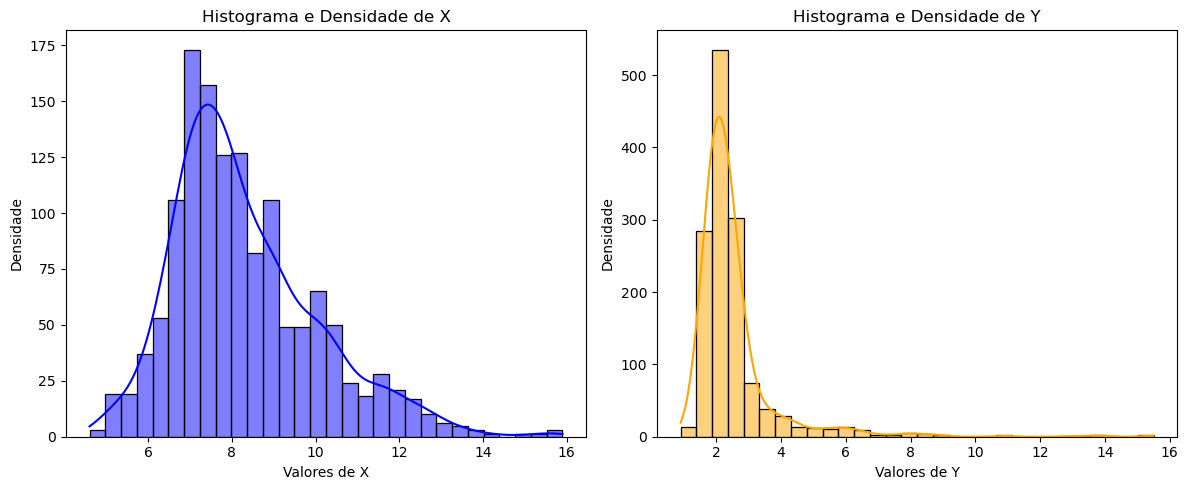

In [10]:
# Gráfico de densidade e histograma para X e Y
plt.figure(figsize=(12, 5))

# X: Histograma com Curva de Densidade
plt.subplot(1, 2, 1)
sns.histplot(X, bins=30, kde=True, color='blue')
plt.title('Histograma e Densidade de X')
plt.xlabel('Valores de X')
plt.ylabel('Densidade')

# Y: Histograma com Curva de Densidade
plt.subplot(1, 2, 2)
sns.histplot(Y, bins=30, kde=True, color='orange')
plt.title('Histograma e Densidade de Y')
plt.xlabel('Valores de Y')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()
